# CS 237 Fall 2019   Homework Ten 


### Due date: PDF file due Friday, April 17th, @ 11:59PM in GradeScope with 3 day grace period

### If you have trouble getting this in by the deadline, please contact Professor Snyder.


### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

 

In [1]:
# General useful imports
import numpy as np
from numpy import arange,linspace,mean, var, std, corrcoef, cov, transpose, ones,log
import matplotlib.pyplot as plt
from numpy.random import random, randint, uniform
import math
from collections import Counter
import pandas as pd
%matplotlib inline

# This will display a list of signals in aligned subplots, with separate titles
# Third parameter is a list of x values to be drawn as scatterplot in red (e.g., for showing peaks)

def plotSignals(signals, titles=[], points=[]):
    print()
    if titles == []:
        if len(signals) > 1:
            titles = ['Signal ' + str(k+1) + '\n' for k in range(len(signals))]
        else:
            titles = ['Signal\n']
    else:
        titles = [t + '\n' for t in titles]
            
    number_of_subplots=len(signals)
    
    N = len(signals[0])

    fig = plt.figure(figsize=(12,number_of_subplots*4))
    fig.subplots_adjust(hspace=0.75)
    #fig.suptitle("Comparison ",fontsize=16)
    
    for i,v in enumerate(range(number_of_subplots)):
        v = v+1
        ax1 = subplot(number_of_subplots,1,v)
        
        ax1.set_ylabel('Amplitude')
        ax1.set_xlabel('Time (ms)') 
        ax1.plot([0,N-1],[0,0],color='black',lw=0.75)
        ax1.plot([0,0],[-1,1],color='black',lw=0.75)    
        ax1.set_ylim([-1.2,1.2])
        plt.xlim([0,N-1])
        ax1.grid(color='0.75')
        ax1.plot(signals[i],color='b',lw=1)
        if points != []:
            ax1.scatter(points[i], [signals[i][points[i][k]] for k in range(len(points[i]))],color='r')
        ax1.set_title(titles[i],fontsize=14)


    plt.show()

# Just an example
  
#plotSignals( [ [math.sin(x/5) for x in range(315)],[math.sin(x/10) for x in range(200)],[math.sin(x/15) for x in range(315)]],\
#              [ "$sin(x/5)$",              "$sin(x/10)$",              "$sin(x/15)$"],\
#              [ [],                        [],                         [0,50,100,150,200,250,300]]                      )



# Basic Numpy statistical functions

X = [1,2,3]

# mean of a list
mean(X)             # might need to use np.mean, np.var, and np.std

# population variance
var(X)

# sample variance    ddof = delta degrees of freedom, df = len(X) - ddof
var(X,ddof=1)                 

# population standard deviation
std(X)

# sample standard deviation
std(X,ddof=1)


# Calculate the covariance and correlation coefficient for two lists of
# values -- must be the same length!

def covariance(X,Y):
    return cov(X,Y)[0][1]

def rho(X,Y):
    return corrcoef(X,Y)[0][1]

def R2(X,Y):
    return corrcoef(X,Y)[0][1] ** 2

# Utility functions

        
# Round to 2 decimal places
def round2(x):
    return np.around(x,2)

# Round to 4 decimal places
def round4(x):
    return np.around(x,4)

# Location of CS 237 data repository

data_url = "http://www.cs.bu.edu/fac/snyder/cs237/Homeworks,%20Labs,%20and%20Code/data/"



## Homework 10 General Instructions

This homework contains analytical problems and also programming problems with some commentary on interpreting the results. The goal is simply to exercise your understanding of joint random variables, covariance, and correlation. An interesting application of correlation to real-world problems is presented. There is even an application to an "out of this world" problem!

### Problem One (Joint Random Variables, Covariance, and Correlation)

Suppose we flip three coins, labelled $C_1$, $C_2$, $C_3$.   Define the following random variables:

  - X = the number of heads showing on the first two coins (i.e., $X\,=\,C_1 + C_2$)
  - Y = the number of heads showing on the last two coins (i.e., $Y\,=\,C_2 + C_3$)

Provide an analysis, showing all work, and not using Python (except to check your calculations),
including the following:

  - The Joint PMF matrix;
  - The marginal probabilities, including the PMFs, mean, and standard deviation for both $X$ and $Y$;
  - Calculation of $Cov(X,Y)$;
  - Calculation of $\rho(X,Y)$; and 
  - State whether $X$ and $Y$ are independent or dependant. 
  
You might want to look at the end of the tutorial on Markdown on the class web page to see how to do
matrices in a Markdown cell.   Or you can insert an image, but make sure it is visible before you submit.

|   |   | Y    |      |      |   |
|---|---|------|------|------|---|
|   |   | 0    | 1    | 2    |   |
|   | 0 | .125 | .125 | 0    |   |
| X | 1 | .125 | .25  | .125 |   |
|   | 2 | 0    | .125 | .125 |   |





### Problem Two (Joint Random Variables, Covarance, and Correlation)

For each of the following, calculate the correlation coefficient $\rho$ using Python (see the end of the first code cell). 

(A) Calculate and print out the correlation coefficient for this Fahrenheit vs Celsius data. 


In [2]:
Xfahrenheit = [45.2, 47.1, 47.5, 49.6, 49.8, 52.0, 54.3, 58.6, 63.2, 64.1] 
Ycelsius = [7.8752, 8.117, 9.2009, 9.3167, 8.4564, 11.4075, 13.9236, 15.0762, 17.4678, 18.4362]

# Print out rho
print("rho(F,C) = ", round4(rho(Xfahrenheit, Ycelsius)))        # Your code here


rho(F,C) =  0.9817


(B) Calculate and print out the correlation coefficient for this data on the height and weight for 25K individuals.

In [3]:
studs = pd.read_csv(data_url + 'biometricdata.csv')
H = list(studs['Height'])
W = list(studs['Weight'])

# Print out rho
print("rho(H,W) = ", round4(rho(H,W)))       # Your code here

rho(H,W) =  0.5029


 (C) For the following three sets of data about students at a local university, use the correlation coefficient to answer the question: "What is a *better* predictor of BU GPA, the SAT score or the High School GPA?"


In [4]:
studs = pd.read_csv(data_url+'StudentData3.csv')
S = list(studs['SAT_TOTAL'])
BG = list(studs['BU_GPA'])
HG = list(studs['HS_GPA'])
    
print("rho(SAT,BU GPA) = ", round4(rho(S, BG)))        # Your code here
print("rho(SAT,HS GPA) = ", round4(rho(S, HG)))        # Your code here
print("rho(HS GPA,BU GPA) = ", round4(rho(HG, BG)))     # Your code here
print("Therefore, the high school GPA is a better predictor of BU GPA")

rho(SAT,BU GPA) =  0.269
rho(SAT,HS GPA) =  0.2481
rho(HS GPA,BU GPA) =  0.4015
Therefore, the high school GPA is a better predictor of BU GPA


(D) Consider the following three functions: 

  - $f(x)\,=\,10x + 10$ 
  - $g(x)\,=\,x^2 + 1$ 
  - $h(x)\,=\,2\cdot 1.5^x$
  

We will consider these as functions on the discrete range 
  $X\,=\,1, 2, ..., 10$, as shown in this graph:

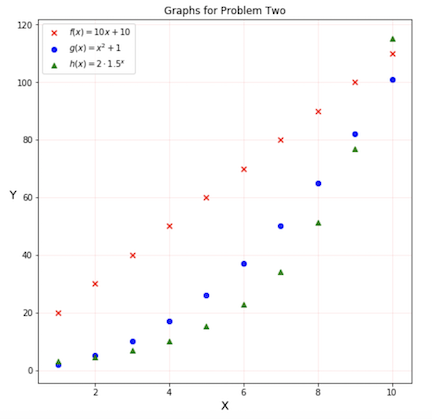

There are $3\choose 2$ pairs of functions: calculate the correlation coefficient for each (using Python) over $[1,2,\ldots,10]$ and rank them from highest to lowest correlation.  For fun, first guess which pair would
have the highest correlation (you will probably guess wrong). 

$ \textbf{Guess: }  \text{I am guessing that G(X) and H(X) are more closely correlated.}$

In [5]:
xLen = 10
fX = []
gX = []
hX = []

for i in range(1, xLen + 1):
    fX.append((10*i) + 10)
    gX.append(i**2 + 1)
    hX.append(round4(2*(1.5**i)))
    
print("rho of f(X) and g(X) = " + str(round4(rho(fX, gX))) + " (Greatest)")
print("rho of g(X) and h(X) = " + str(round4(rho(gX, hX))) + " (Second Greatest)")
print("rho of f(X) and h(X) = " + str(round4(rho(fX, hX))) + " (Least Greatest)")

rho of f(X) and g(X) = 0.9746 (Greatest)
rho of g(X) and h(X) = 0.9706 (Second Greatest)
rho of f(X) and h(X) = 0.9006 (Least Greatest)


$ \textbf{Answer: } \text{The coefficent correlation between f(x) and g(x) was the closest with 0.9746, which is contrary to my guess.} $

### Problem Three (Joint Random Variables, Covarance, and Correlation)

Suppose there are 300 cards in a box numbered 1 through 300 (without leading 0's). Therefore, the number of each card has 1, 2, or 3 digits. A card is drawn at random from the box. Suppose that the number on the card has $X$ digits of which $Y$ are the digit 0. Suppose we would like to know whether $X$ and $Y$ are correlated ($\,\rho>0\,$), inversely correlated ($\,\rho<0\,$), or uncorrelated ($\,\rho=0\,$). 
Determine $\rho(X,Y)$, hence settling the question.

Hint:  Here are some examples of how $X$ and $Y$ are determined:
<pre>
   Number on Card  X      Y
        1          1      0
        10         2      1
        55         2      0
        100        3      2
        299        3      0
        300        3      2
</pre>

In [6]:
cardsX = []
cardsY = []

for k in range (1, 301):
    cardsX.append(len(str(k)))
    cardsY.append(str(k).count("0"))


cardsCoefCor = rho(cardsX, cardsY)
print("The coefficient correlation between X and Y is " + str(round4(cardsCoefCor)) + " therefore they are correlated because the value is positive.")

The coefficient correlation between X and Y is 0.1442 therefore they are correlated because the value is positive.


### Problem Four  (Correlation, Continuous Distributions,  and Non-Linear Relationships)

(A) Let $X$ be uniformly distributed over $[-1..1]$ and define $Y = X^2$. Show that $\rho(X,Y) = 0$. (This shows that RVs with a perfectly well-defined relationship may be uncorrelationed in terms of $\rho$, I showed this example in class but did not prove it.)

(B) Suppose we change the previous problem so that $X$ is uniformly distributed over $[0..1]$ and again define $Y=X^2$. Calculate $\rho(X,Y)$ (it will not be 0).

Hint: For (B), note that $X$ is continuous, so first solve:

$$E(X^n)\,=\, \int_{0}^{1} x^n dx\,=\, ?$$

$ \textbf{A:} $
$$\text{X is uniformly distributed: } $$
$$E(X)\,=\, \int_{-1}^{1} x*dx\,=\, 0$$

$$ P(X,X^2) = \frac{E(X * X^2) - \mu_{x} * \mu_{x^2}}{\sigma_{x} * \sigma_{x^2}} \\
    = \frac{E(X^3) - \mu_{x} * \mu_{x^2}}{\sigma_{x} * \sigma_{x^2}} \\
    = \frac{0 - (0*0)}{0 * 0} \\
    = 0$$


$\textbf{B:} $

$$E(X^3)\,=\, \int_{0}^{1} x^3*dx\,=\, \\
= \frac{x^4}{4} \\
= \frac{1}{4}$$ 

$$E(X^2)\,=\, \int_{0}^{1} x^2*dx\,=\, \\
= \frac{x^3}{3} \\
= \frac{1}{3}$$ 

$$E(X)\,=\, \int_{0}^{1} x*dx\,=\, \\
= \frac{x^2}{2} \\
= \frac{1}{2}$$ 

$$ \rho(X,X^2)= \frac{E(X^3) - \mu_{x} * \mu_{x^2}}{\sigma_{x} * \sigma_{x^2}} \\ = \frac{0.25 - (\frac{1}{3} * \frac{1}{2})}{(\frac{1}{\sqrt{12}})^2} \\ = \frac{0.0833
}{0.0833 * 0.0833}$$



### Problem Five (Correlation, Continuous Distributions,  and Linear Relationships)

(A) Show that if $X$ and $Y$ are independent, then $\rho(X,Y)=0.$ 

(B) What is the relationship between $\rho(\,aX+b,Y\,)$ and $\rho(\,X,Y\,)$?  
There is a different answer for each of the cases $a<0$, $a>0$, and $a=0$, so
you will need to account for that, but the answer in each case is extremely simple. 

Give your solution and explain your reasoning carefully. 


Hint for (A): use one of the theorems about the "linearity of expectation" that we studied in lecture. 

#### The next cell contains code for the remaining problems

In [7]:
N = 315
X = list(range(N))
Y = [np.sin(x/10) for x in X]


########### NOTE: In the following, we use a nice feature of matplotlib, that when the X axis   ################
###########       is omitted, and only the Y values given, then it assumes X = [0, 1, ..., len(Y)-1]  ##########

# Plot a signal Y
def plotSignal(Y,titl='Signal',N=0):
    if N == 0:
        N = len(Y)
    plt.figure(figsize=(12,4))
    plt.grid()
    plt.plot(Y)                 
    plt.plot([0,(N-1)],[0,0],color='black')
    #plt.xlim([0,N-1])
    plt.title(titl)
    plt.xlabel("The X Values = Time")
    plt.ylabel("The Y Values = Amplitude")
    plt.show()

#test

#plotSignal(Y,'A Simple Signal:  y = sin(x/10) for 0 <= x < 315')

# Just plotting two signals lined up along the x axis
def plot2Signals(Z1,Z2,title1="Signal 1", title2="Signal 2",N=0):
    if N == 0:
        N = len(Z1)
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=.5)
    ax1 = fig.add_subplot(211) 

    plt.title(title1)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (ms)') 
    plt.plot([0,N-1],[0,0],color='black')
    plt.xlim([0,N-1])
    plt.ylim([-1.2,1.2])
    plt.grid()
    plt.plot(Z1)


    fig.add_subplot(212,sharex=ax1) 
    plt.title(title2)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (ms)') 
    plt.plot([0,N-1],[0,0],color='black')
    plt.xlim([0,N-1])
    plt.ylim([-1.2,1.2])
    plt.grid()
    plt.plot(Z2)

    plt.show()
    
# test

#plot2Signals([math.sin(x/5) for x in X],[math.sin(x/10) for x in X])


# Just plotting three signals lined up along the x axis
# X is the values along the x-axis
def plot3Signals(Z1,Z2,Z3,title1="Signal 1", title2="Signal 2", title3="Signal 3",N=0):
    if N == 0:
        N = len(Z1)
    fig = plt.figure(figsize=(12,10))
    fig.subplots_adjust(hspace=.5)
    ax1 = fig.add_subplot(311) 

    plt.title(title1)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (ms)') 
    plt.plot([0,N-1],[0,0],color='black')
    plt.xlim([0,N-1])
    plt.ylim([-1.2,1.2])
    plt.grid()
    plt.plot(Z1)


    fig.add_subplot(312,sharex=ax1) 

    plt.title(title2)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (ms)') 
    plt.plot([0,N-1],[0,0],color='black')
    plt.xlim([0,N-1])
    plt.ylim([-1.2,1.2])
    plt.grid()
    plt.plot(Z2)


    fig.add_subplot(313,sharex=ax1) 

    plt.title(title3)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (ms)')
    plt.plot([0,N-1],[0,0],color='black')
    plt.xlim([0,N-1])
    plt.ylim([-1.2,1.2])
    plt.grid()
    plt.plot(Z3)
    plt.show()
    
# test

#plot3Signals([math.sin(x/5) for x in X],[math.sin(x/10) for x in X],[math.sin(x/30) for x in X])


## Applications of Correlation: Frequency Analysis of Audio Signals

The remaining problems are about the use of correlation to determine the frequency of wave forms with a repetitive structure, such as musical signals. We will first understand what <i>signals</i> are, and then how correlation can be used to quantify how similar two signals are.  


A <b> signal </b> $X$ is just a function from non-negative integers into the reals:

$$X\,:\,  [0,1,.., (N-1)]\,\rightarrow\,[-1..1]$$

where $t = 0, 1, 2, ...., N-1$ represents time (in some units, such as milliseconds) and $[-1..1]$ represents the amplitude of the signal, a real number between $-1$ and $1$. 

For instance here is an example which is just a sine wave, where $N=315$:

$$ X(x) = sin(\,x/10\,)\,\,,\,\text{for}\,\, k = 0, 1, \cdots, 314.$$

    X =  [0.0885, 0.0932, 0.0936, 0.0915, 0.089, ..., -0.0009, -0.001, -0.001]
    
A <b> periodic signal </b> $X$ has a pattern that repeats every $p$ time units, where $p$ is called the <b> period</b>. Technically, a signal $X$ of length $N$ is periodic if there exists $p>0$ such that

$$X[x] = X[x+p]\text{ for } 0\le x\lt N-p$$


In this lab we will be dealing with signals that are periodic, or approximately periodic. The following signal has a period of 50 milliseconds (the x-axis is in milliseconds), or 20 Hz (20 cycles per second), which is
about the lowest sound humans can hear (the lowest note on a concert grand piano is 27.5 Hz). 


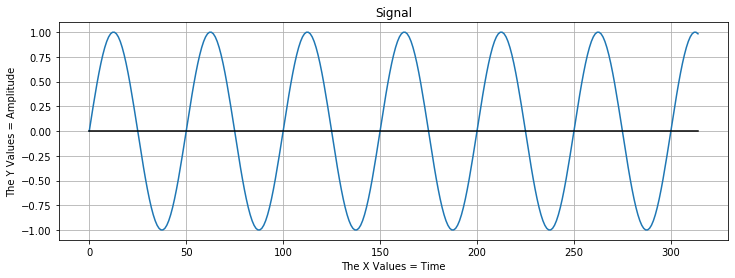

In [8]:
# Important:  See the note above about how you don't have to include the X values

plotSignal([np.sin(x/7.9577) for x in X])  

 For the rest of this lab, we will be dealing with sequences that are signals, but all you need to know is that they behave like random variables which, when you "poke" them, give the values $X[0], X[1], X[2], ...$. Therefore, it is not surprising that we can take the correlation of two signals. 

The <strong> correlation of two signals </strong> of length $N$ is exactly the same as if we consider them to be equiprobable, finite random variables:

$$Cov(X,Y)\,=\, E(X\cdot Y) - \mu_X\cdot \mu_Y \,=\, \frac{\sum_{i=0}^{N-1}X[i]\cdot Y[i]}{N} - \mu_X\cdot \mu_Y$$

$$\rho(X,Y)\,=\,\frac{Cov(X,Y)}{\sigma_X\cdot\sigma_Y}$$

### Problem Six

(A) Using Y as shown in the next cell, calculate the following two signals:

<pre>
     Z1 = -Y             # flip the sine wave around the x-axis by multiplying every value by -1
     Z2 = Y * Y          # Multiply the signal by itself at each point (like doing a dot product, but stopping
                           before adding all the products together)
</pre>


Using the function `plot3Signals(...)`, print out the signals $Y$, $Z1$, and $Z2$.

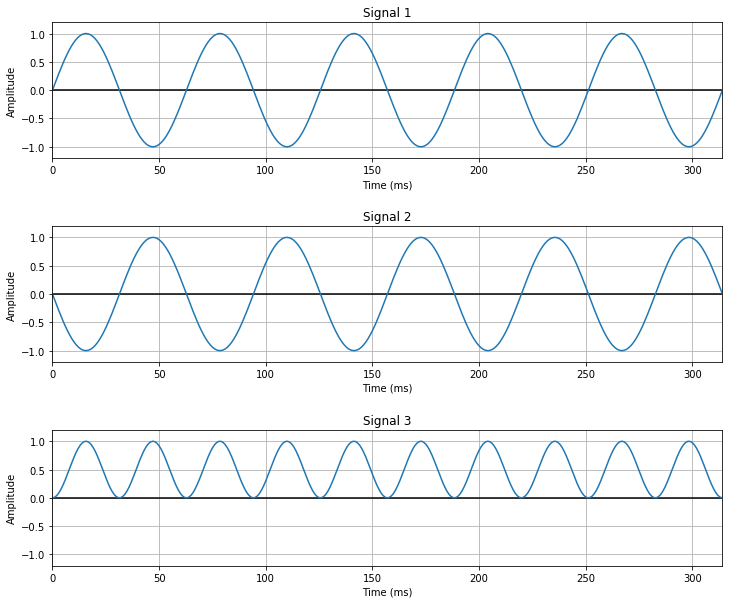

In [9]:
Y = [np.sin(x/10) for x in X]
Z1 = [-k for k in Y]
Z2 = [k**2 for k in Y]
plot3Signals(Y,Z1,Z2)

### Part (B)

Calculate and print out the correlation coefficient between

  - Y and Z1
  - Y and Z2
  - Z1 and Z2
  
Round to four decimal places as usual.   

In [10]:
# (B) solution
print("The correlation coefficient between Y and Z1 is : " + str(round4(rho(Y, Z1))))
print("The correlation coefficient between Y and Z2 is : " + str(round4(rho(Y, Z2))))
print("The correlation coefficient between Z1 and Z2 is : " + str(round4(rho(Z1, Z2))))

The correlation coefficient between Y and Z1 is : -1.0
The correlation coefficient between Y and Z2 is : 0.0
The correlation coefficient between Z1 and Z2 is : -0.0


(C)  Your turn!  Now I would like you to experiment with signals in the following form:

$$\quad Z[x] = sin\left(\,{x\over scale}\,- lag\right)\quad \text{for}\quad 0\le x\lt 315.$$
 
where <code>scale</code> and <code>lag</code> have various values. What we would like you to
do is try various values of these parameters and see how they affect the signal. 

Be sure to try setting <code>lag</code> to 0 and try various values of <code>scale</code>, and also setting <code>scale</code> to 10.0 and trying various values of <code>lag</code>.

In each case, examine the signals and also print out $\rho(Y,Z)$, where $Y$ is as in Part (A), and then answer the following questions (you don't need to give any of your graphs or $\rho$'s). 

1. What happens when you fix <code>scale</code> at 10 and move <code>lag</code>? Describe what happens to the graph and also to $\rho(Y,Z)$. 

2. What happens when you fix <code>lag</code> at 0 and change <code>scale</code>? Be sure to try integer values and also floats (e.g., 3.45, 11.83, etc.). Describe what happens to the graph and also to $\rho(Y,Z)$.  

3. For which values of <code>scale</code>  and <code>lag</code> does $\rho(Y,Z)$  most closely approach 1.0?

Hint for 3: Since this is about sine waves, you might want to think about how $\pi$ is involved....



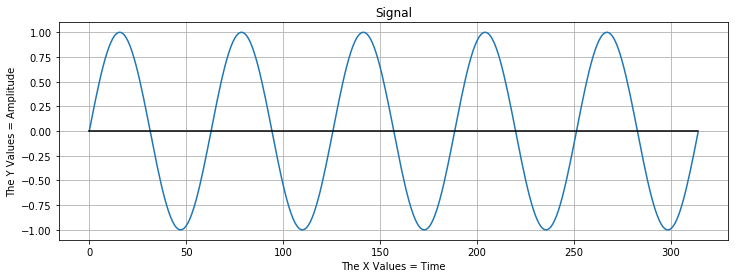

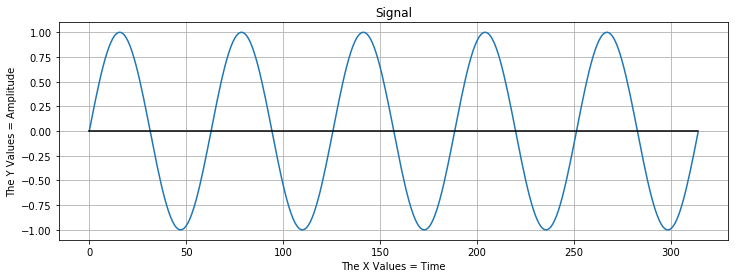

The rho of Y and Z is : 1.0


In [11]:
lag = 0
scale = 10

Z = [math.sin((k/scale)-lag) for k in range(315)]
plotSignal(Y)
plotSignal(Z)
print("The rho of Y and Z is : " + str(round4(rho(Y, Z))))


$ \textbf{1:}$

$ \text{as the lag increases, the graph shifts to the right, also the rho moves all over from negative to positive as the lag changes}$

$ \textbf{2:}$

$ \text{as the scale gets further away from 10, both up and down, the rho goes more and more negative because the peaks get closer/tighter if the scale goes lower, and they become more spread out as the scale increases.$

$ \textbf{3:}$

$ \text{It is closer to one if the scale and lag are as tightly bound on 0, and 10 as possible, I actually also noticed the lag 50 and scale 10 had a semi close to 1 rho.}$

### Problem Seven (Lagged Signals)

We are interested in comparing a signal with itself to determine if it is periodic, and if so, what the period is; from this we can determine the frequency of the signal. 

If we have a formula for a signal, we can calculate this by simply subtracting the lag from the time before calculating the signal, as we did in the previous problem.  This will look ahead in time to the signal as it will be $lag$ units of time in the future.  

Unfortunately, we are not always given a formula for a signal; sometimes we have a recording of an actual sound or some other real phenomenon, and we have to manipulate the original signal. In this problem we will learn how to do that. The main thing to understand is that a signal of length $N$, when advanced by an amount $lag$, will be of length $N-lag$, and so you have to watch that you don't run off the end of the array. 

#### Part (A)  

Using `plot2Signals`, print out the plots for $Y$ and also

$$\quad Z[x] = Y[x+lag]\quad \text{for}\quad 0\le x\lt N - lag.$$

for lag = 0, 10, 50, and 200.   Notice that only the last $N-lag$ values of $Y$ are used in $Z$. 
Don't print all these out for submission, just experiment and make sure you understand how
the lagged signal is constructed from $Y$, and print out the case $lag = 50$ for submission.  

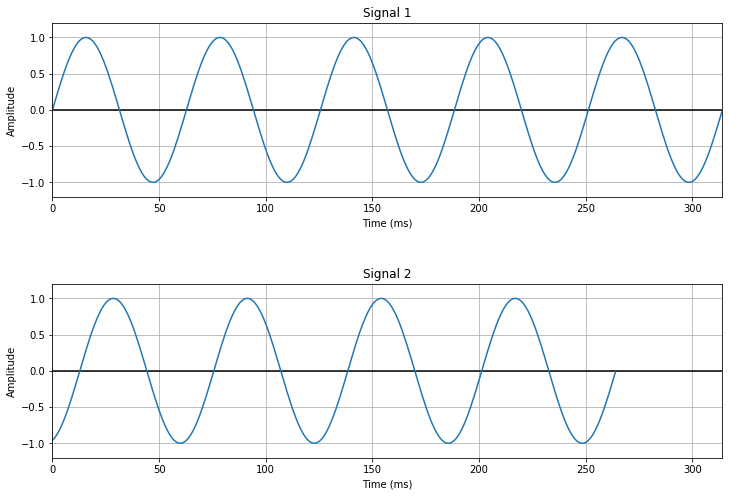

In [24]:
lag = 50
Y = [np.sin(x/10) for x in X]
Z = []

for k in range(lag, len(Y)):
    Z.append(Y[k])
    
plot2Signals(Y, Z)



#### Part (B)

Now we want you to trim the original signal $Y$ so that it is the same length as its lagged version.

For lag = 0, 10, 50, and 200, plot the first $N-lag$ values in $Y$ and the lagged signal. They
should be the same length! Set the $lag = 50$ for submission, after playing around with it. 

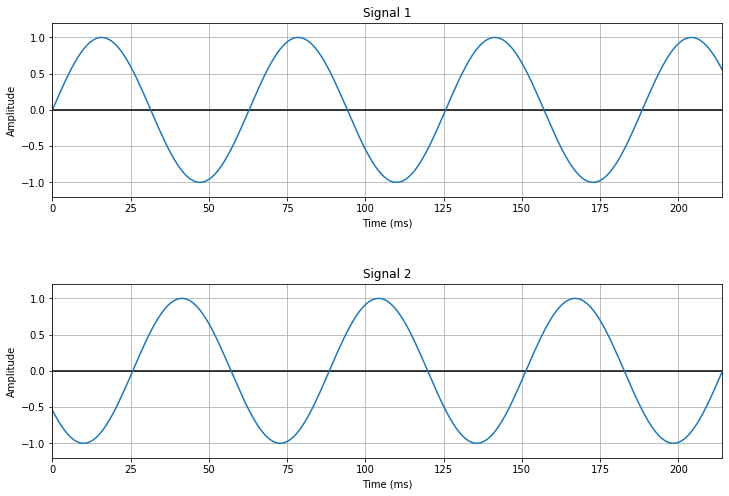

In [27]:
lag = 50
Y = [np.sin(x/10) for x in X]
Z = []

for k in range(lag, len(Y)):
    Z.append(Y[k])
Y = [np.sin(x/10) for x in range((len(X) - lag))]
plot2Signals(Y, Z)

#### Part (C)

Finally, print out the $\rho$ values for each of the lagged signals with a trimmed version of the original signal, for lag = 0, 10, 50, and 200. Note that `rho(..)` expects each argument to be the same length. 

In [39]:
def getRhoForLagDefaultY(input):
    lag = input
    Y = [np.sin(x/10) for x in X]
    Z = []
    for k in range(input, len(Y)):
        Z.append(Y[k])
    Y = [np.sin(x/10) for x in range((len(X) - input))]
    return round4(rho(Y, Z))

''' 
# Should be close to 
1.0
0.5591
0.2513
0.4763
'''
print("The rho for lag 0 is : " + str(getRhoForLagDefaultY(0)))
print("The rho for lag 10 is : " + str(getRhoForLagDefaultY(10)))
print("The rho for lag 50 is : "+ str(getRhoForLagDefaultY(50)))
print("The rho for lag 200 is : "+ str(getRhoForLagDefaultY(200)))

The rho for lag 0 is : 1.0
The rho for lag 10 is : 0.5591
The rho for lag 50 is : 0.2513
The rho for lag 200 is : 0.4763


### Problem Eight (Autocorrelation of a Signal)


The <i> autocorrelation </i> of a signal is the correlation of the signal with a lagged version of itself (the signal
would have to be trimmed to find the correlation as in the last problem). 
When the autocorrelation is 1.0 for a given $lag$ value, then the signal is periodic with period $p=lag$ time units;
for real-world signals, where there may be noise or other frequencies present, we will look for
maximum in the signal, which would indicate periodicity. The maxima are usually called "peaks" for obvious reasons. 

In this problem, we want you to graph the autocorrelation of a signal with itself at various lags from 0 to N/2
and calculate where the maxima/peaks are. 

(A) Fill in the following template to generate the autocorrelation signal; it should have a *familiar* shape, which is
why we call it a signal!

*Note carefully how the autocorrelation is at a maximum when it is at the period of the signal.*  That's 
the whole point!


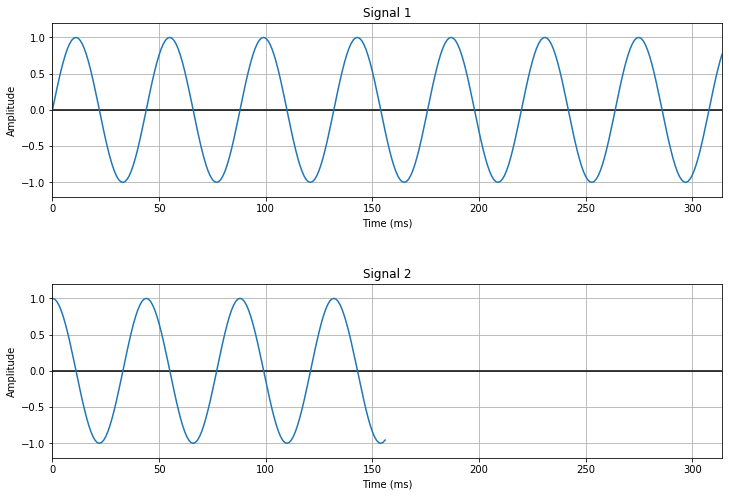

In [55]:
def getAutoCorrelation(Y):
    N = len(Y)
    temp = []
    for lag in range(int(N/2)):
        temp.append(getRhoForLagCustomY(Y, lag))
    return temp

def getRhoForLagCustomY(Y, input):
    lag = input
    Z = []
    for k in range(input, len(Y)):
        Z.append(Y[k])
    tempY = Y[:(len(Y) - lag)]
    return round4(rho(tempY, Z))
    
N = 315          
Y = [math.sin(x/7) for x in range(N)]     # 315 is evenly divisible by 7 so you get a clean autocorrelation

plot2Signals(Y,getAutoCorrelation(Y))


(B) Repeat for the following signal. 

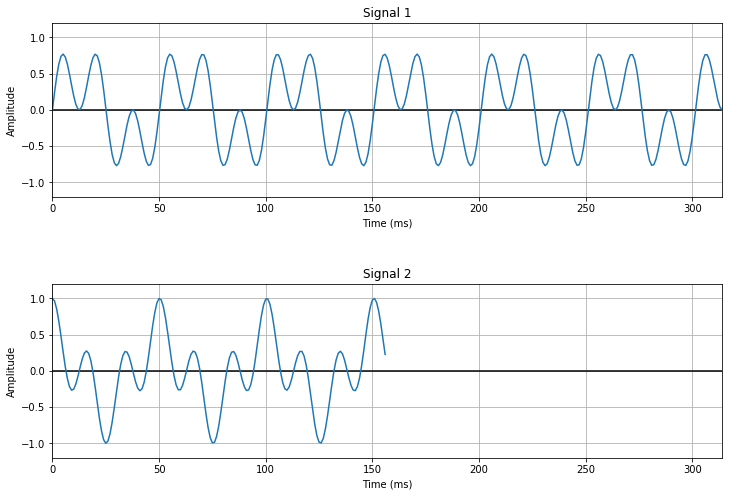

In [56]:
N = 315          
Y = [math.sin(x/4)*math.cos(x/8) for x in range(N)]

plot2Signals(Y,getAutoCorrelation(Y))

(C) A <b> period </b> of a periodic (i.e., repeating) signal is a time period between successive repeats
of the pattern.  The **fundamental period** is the smallest such period. (Often "period" simply means fundamental period.)

   - What is the fundamental period (approximately) of the signal $Y$ in (B)?
   - What do the maxima of the autocorrelation curve correspond to?
   - Why are there multiple maxima? When do they occur and  why?

$ \text{In (B), the fundamental period appears to be 50} $

$ \text{They correspond to the places in which the original hits 0, AKA the end of a period} $

$ \text{There are multiple maxima because there are multiple periods represented in the above graphs.$

### Problem Nine (Fundamental Frequency and Peak Picking)

As we have just seen, the autocorrelation of a signal can be used to determine whether the signal is periodic, i.e., repeats at fixed intervals, such as with a sine wave. 


The <b> fundamental period </b> of a periodic signal is the *smallest non-zero lag* at which the signal repeats, which corresponds to the smallest lag at which there is a maximum in the autocorrelation curve. Frequency is the inverse of the period, i.e., if a signal has a period of 0.1 seconds, then its frequency is 10 Hertz, where "M Hertz"
means "M cycles per second."  The **Fundamental Frequency** is the inverse of the fundamental period, and
is the smallest frequency which characterizes the signal; in music it is what you would call the "pitch" of a note. 


The maxima or <b>peaks</b> in any signal $A$ are locations $t$ at which 

$$A[t-1]\,\,<\,\, A[t] \,\, >\,\, A[t+1]$$

as shown in red at $t=2$ in the next figure:

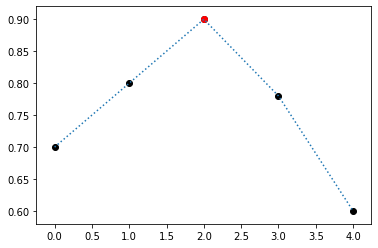

In [57]:
Y=[0.7,0.8,0.9,0.78,0.6]
X=[0,1,2,3,4]
plt.plot(X,Y,ls=':')
plt.scatter(X,Y,color='k')
plt.scatter([2],[0.9],color='r')
print()

These peaks can be easily identified with a scan through the signal. Note that we are calling the autocorrelation curve $A$ a <i> signal</i> because that is what it is!


(A) Fill in the following template, which takes a signal, and returns a list of points where peaks (maxima) occur,
as defined above. The points should be in the form of pairs of x,y values, i.e., $(t,A[t])$ for each $t$ where
a peak occurs. 

We will not consider the first or last value in the signal to be a peak, no matter how big it is,
since there has to be a smaller value on each side; keep this in mind when writing your for loop....

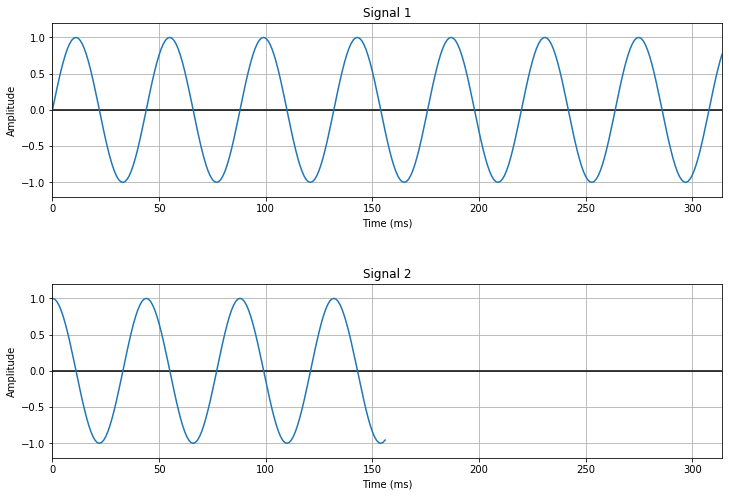

[(44, 1.0), (88, 1.0), (132, 1.0)]



In [65]:
def findPeaks(A):  
    peaks = []
    for k in range (1, len(A) -1):
        if (A[k-1] < A[k] and A[k] > A[k+1]):
            peaks.append((k, A[k]))
    return peaks
    
N = 315          
Y = [math.sin(x/7) for x in range(N)]     # 315 is evenly divisible by 7 so you get a clean autocorrelation
A = getAutoCorrelation(Y)
plot2Signals(Y,A)

print(findPeaks(A))

# should look similar to this:
'''
[(44, 0.99999...), (88, 0.9999...), (132, 0.9999...)]
'''
print()

(B) Now, a common heuristic used in audio computation is to find the fundamental frequency by using the first peak in the autocorrelation which exceeds a given threshold, say 0.9. For the next example,
scan through the peaks returned by the function, and output the first $t$ value for a peak $A[t] > 0.9$. Express this as "Period found at $t$ time units" for the $t$ you found. 

Note: ONLY print out the *first* peak that exceeds the threshold, not all. Make sure you are printing out
the time (an integer) and not the value of $A$ at the peak (a float).

In [67]:
threshold = 0.9

N = 315          
Y = [math.sin(x/7) for x in range(N)]     # 315 is evenly divisible by 7 so you get a clean autocorrelation
A = getAutoCorrelation(Y)
def findPeakThreshold(thresh, A):  
    for k in range (1, len(A) -1):
        if (A[k-1] < A[k] and A[k] > A[k+1] and A[k] > thresh):
            return k

print("Period found at " + str(findPeakThreshold(threshold, A)) + " time units")

Period found at 44 time units


(C) Repeat the same experiment for the signal in Part (B) of the previous problem. 

In [68]:
N = 315          
Y = [math.sin(x/4)*math.cos(x/8) for x in range(N)]
A = getAutoCorrelation(Y)
print("Period found at " + str(findPeakThreshold(threshold, A)) + " time units")

Period found at 50 time units


### Problem Ten: Fundamental Frequency of Some Real Signals

In this problem we will try to determine the fundamental frequency of some actual real-world signals.
There are two terms you should know:

  - Hertz (Hz) = the number of cycles per second 
  - Sample Rate (SR) = the number of "time units" per second, given in Hz. 
  
For example, Middle C on the piano is 261.6 Hz, because when you strike the key, the string vibrates
back and forth 261.6 times per second.  The signal on your music CD has 44,100 samples per second,
so the sample rate is 44,100 Hz or 44.1 kHz (kiloHertz). 

In this problem, we will use the same technique just shown to determine the fundamental frequency of each of the signals below, and
then translate it into Hertz (cycles/second) by the following formula, if the period is found at $p$ time units:

 $$\text{Fundamental frequency} =  {\text{SR} \over p}\,\,\text{Hz}$$

In all the sound files we will experiment with,  SR = 44,100 Hz. 

In [69]:
import wave
import array
import contextlib
import requests


# If file is not in local directory, download from URL, otherwise get local copy

def getWaveFile(url):
    infile = (url.split('/'))[-1]      # Get the file name from the URL
    try:
        with contextlib.closing(wave.open(infile)) as f:    # if file in local directory, use that
            params = f.getparams()
            frames = f.readframes(params[3])
        return list(array.array('h', frames))
    except IOError:
        myfile = requests.get(url)                          # else, download a local copy, then use it
        open(infile, 'wb').write(myfile.content)
        with contextlib.closing(wave.open(infile)) as f:
            params = f.getparams()
            frames = f.readframes(params[3])
        return list(array.array('h', frames))


(A) This signal is an actual sound file, but of a single sine wave. First, print out the signal and
the autocorrelation signal using `plot2Signals(...)`. Then, using a threshold of 0.9, print out the fundamental frequency.  Also, LISTEN to the file using iTunes or other audio player!

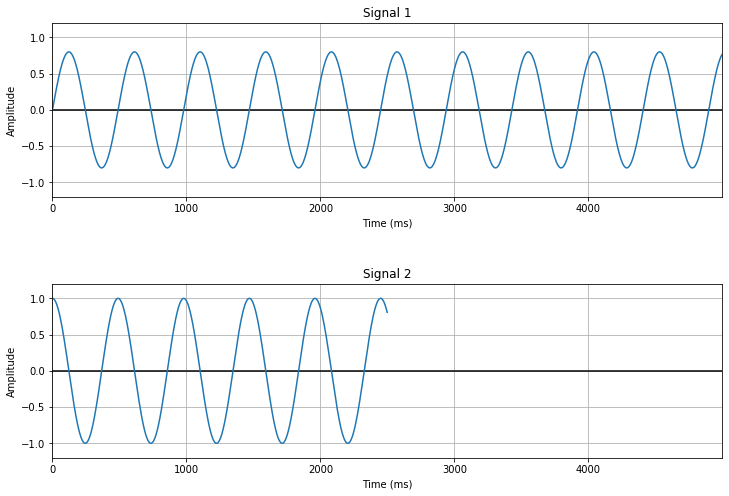

The fundamental frequency is: 490


In [74]:
# (A) 

SR = 44100

Y = getWaveFile(data_url + 'MysterySignal01.wav')[:5000]
Y = [(y/32767) for y in Y]     # we have to scale the amplitude because its range is not -1 to 1. 
A = getAutoCorrelation(Y)

plot2Signals(Y, A)
firstFund = findPeakThreshold(0.9, A)
print("The fundamental frequency is: "+ str(firstFund))


(B) The next file is of my 1959 Martin steel-string guitar, where I'm playing the low A string. Determine the fundamental frequency of the signal. Use a threshold of 0.9. Listen to the file as well!

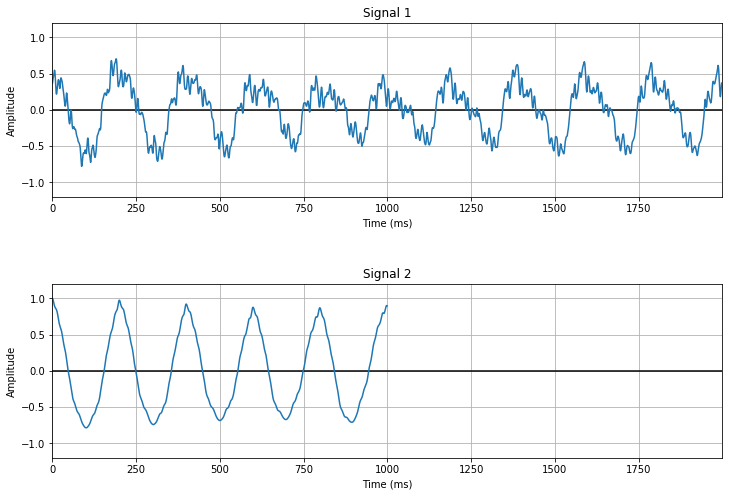

The fundamental frequency is: 200


In [73]:
Y = getWaveFile(data_url + 'SteelString.wav')[1000:3000]
Y = [(y/32767) for y in Y]
A = getAutoCorrelation(Y)

plot2Signals(Y, A)
firstFund = findPeakThreshold(0.9, A)
print("The fundamental frequency is: "+ str(firstFund))

(C) This is a recording of a bell; unfortunately, we can not always use such a high threshold as 0.9; for this 
one, you need to set the threshold to around 0.7.

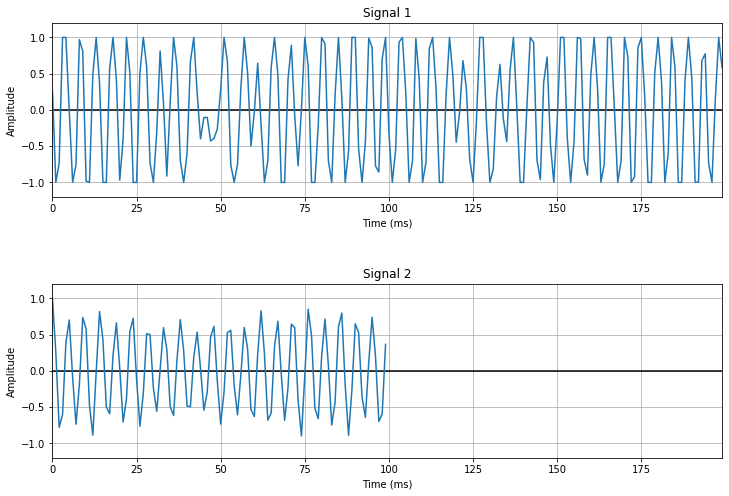

The fundamental frequency is : 5


In [75]:
Y = getWaveFile(data_url + 'Bell.wav')[1000:1200]
Y = [(y/32767) for y in Y]

A = getAutoCorrelation(Y)

plot2Signals(Y, A)
firstFund = findPeakThreshold(0.7, A)
print("The fundamental frequency is : "+ str(firstFund))

(D)   This is a recording of the radio signal of the pulsar PSR J0437+4715, the dead neutron star left after a supernova, 
and which has the mass of about our sun but the size of Boston, rotating rapidly and emitting pulses of radiation. From Wikipedia: 

<blockquote>
PSR J0437−4715 is a pulsar. Discovered in the Parkes 70 cm survey, it remains the closest and brightest millisecond pulsar known. .....   It emits a searchlight-like radio beam that sweeps past the Earth each time it rotates. Currently the most precisely located object outside of the Solar System, PSR J0437-4715 is 156.3 parsecs or 509.8 light-years distant.
</blockquote>

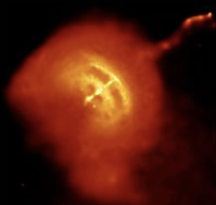

<blockquote>
This pulsar is distinguished by being the most stable natural clock known and is debatably more stable than man-made atomic clocks. Its stability is about one part in $10^{15}$. Two other pulsars, PSR B1855+09 and PSR B1937+21 are known to be comparable in stability to atomic clocks, or about 3 parts in $10^{14}$. 
</blockquote>


How fast is it rotating? We will find out in this problem. 

Run the code and find out its rotation speed in Hz.  Use a threshold of 0.7. 

Listen to this file too, it sounds like an angry bee!

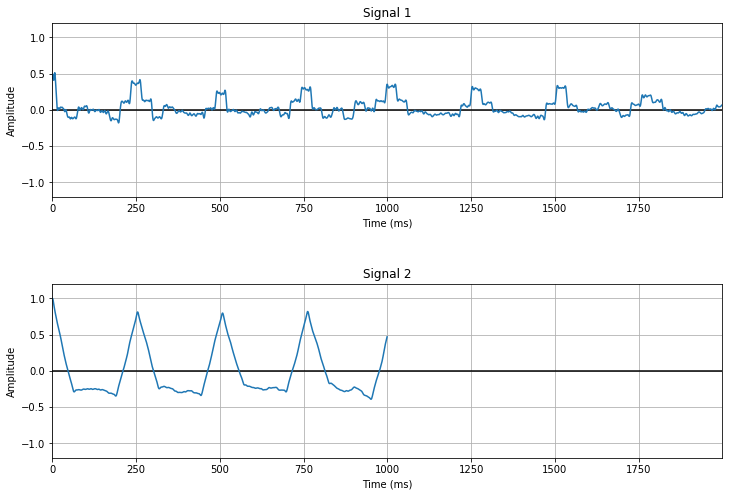

The fundamental frequency is : 254


In [76]:
# (D)
Y = getWaveFile(data_url + 'pulsar.wav')[:2000]
Y = [(x/32767) for x in Y]

A = getAutoCorrelation(Y)

plot2Signals(Y, A)
firstFund = findPeakThreshold(0.7, A)
print("The fundamental frequency is : "+ str(firstFund))
